# **Bellabeat Case Study**

[FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit)

# About Bellabeat
 
Bellabeat is a health and wellness company focused on creating smart wearables designed specifically for women. The company’s products include the Leaf (a health tracker that monitors activity, sleep, stress, and reproductive health), the Time (a hybrid wellness watch), and Spring (a smart water bottle). Bellabeat’s offerings integrate with their proprietary app, providing users with insights into their overall wellness, helping them track menstrual cycles, and offering personalized health recommendations.

# PHASE 1 : ASK

Key objectives:

**1.Identify the business task:**

The company better target their marketing efforts into their customer's needs based on their usage of their fitness smart devices. With this info then make high-level recommendations for how these trends can inform Bellabeat marketing strategy.

**2.Consider key stakeholders:**

The main stakeholders here are Urška Sršen, Bellabeat’s co-founder and Chief Creative Officer; Sando Mur, Mathematician and Bellabeat’s cofounder; And the rest of the Bellabeat marketing analytics team.

**3.The business task:**

Given these facts, the business task is defined as searching for user patterns of usage of their smart devices in order to gain insights that would later better orientate marketing decisions. So, in one phrase it would be:

How do our users use our smart devices?

# PHASE 2 : Prepare
Key objectives:

**1. Determine the credibility of the data:**

The data is public data from FitBit Fitness Tracker Data. It's a dataset from thirty fitbit users that includes minute-level output for physical activity, heart rate, and sleep monitoring. It's a good database segmented in several tables with different aspects of the data of the device with lots of details about the user behaviour.

**2. Sort and filter the data:**

For this analysis I'm going to focus on the daily timeframe as my analysis is focused on detecting high-level trends in usage, not in the detailed performance of the users. For that the most interesting data for me is all the daily activity and the sleep data as they will probably show some interesting patterns but I'll have to merge some tables together to do my analysis.

In [5]:
library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(tidyr)

# Importing datasets
For this project, I will use FitBit Fitness Tracker [Data](https://www.kaggle.com/datasets/arashnic/fitbit)

In [6]:
dailyActivity_merged <- read.csv("../input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
dailyCalories_merged <- read.csv("../input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
dailyIntensities_merged <- read.csv("../input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
dailySteps_merged <- read.csv("../input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
sleepDay_merged <- read.csv("../input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weightLogInfo_merged <- read.csv("../input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

In [7]:
head(dailyActivity_merged)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [8]:
#Here I join all the daily tables data and the sleep data. They share the Id and date columns so it easy to simply merge them by Id and then leave only one date column.
merge_1 <- merge(dailyActivity_merged, dailyCalories_merged, by = c("Id","Calories"))
merge_2 <- merge(dailyIntensities_merged, dailyIntensities_merged, by = c("Id","ActivityDay","SedentaryMinutes", "LightlyActiveMinutes","FairlyActiveMinutes","VeryActiveMinutes", "SedentaryActiveDistance", "LightActiveDistance", "ModeratelyActiveDistance", "VeryActiveDistance"))

merge_daily <- merge(merge_1, merge_2, by = c("Id","ActivityDay","SedentaryMinutes", "LightlyActiveMinutes","FairlyActiveMinutes","VeryActiveMinutes", "SedentaryActiveDistance", "LightActiveDistance", "ModeratelyActiveDistance", "VeryActiveDistance")) %>%
select(-ActivityDay) %>% rename(Date = ActivityDate)

daily_data <- merge(merge_daily, sleepDay_merged, by = "Id",all=TRUE) %>% drop_na() %>% select(-SleepDay, -TrackerDistance)

options(repr.plot.width=30)

In [9]:
summary(daily_data)

       Id            SedentaryMinutes LightlyActiveMinutes FairlyActiveMinutes
 Min.   :1.504e+09   Min.   :   0.0   Min.   :  0.0        Min.   :  0.00     
 1st Qu.:4.020e+09   1st Qu.: 687.0   1st Qu.:  0.0        1st Qu.:  0.00     
 Median :4.703e+09   Median : 781.0   Median :171.0        Median :  3.00     
 Mean   :5.117e+09   Mean   : 938.6   Mean   :156.4        Mean   : 13.58     
 3rd Qu.:6.962e+09   3rd Qu.:1440.0   3rd Qu.:240.0        3rd Qu.: 19.00     
 Max.   :8.792e+09   Max.   :1440.0   Max.   :518.0        Max.   :143.00     
 VeryActiveMinutes SedentaryActiveDistance LightActiveDistance
 Min.   :  0.00    Min.   :0.0000000       Min.   : 0.000     
 1st Qu.:  0.00    1st Qu.:0.0000000       1st Qu.: 0.000     
 Median :  0.00    Median :0.0000000       Median : 2.860     
 Mean   : 18.76    Mean   :0.0005276       Mean   : 2.771     
 3rd Qu.: 28.00    3rd Qu.:0.0000000       3rd Qu.: 4.480     
 Max.   :210.00    Max.   :0.1100000       Max.   :10.300     
 Moder

# PHASE 3 & 4: Process and Analyse

Key objectives:

**1.Clean the data, and prepare the data for analysis:**

With all the daily data in one place I can now focus on some aspects that interest me to see if there are any trends for me to identify. I think that watching the calories burn by activity type and user and seeing the relation of the activity and the sleep quality will be the focus of my analysis. For that I will create some new summarized tables where I will classify some of the aspects of the data into more easily interpretable categories for the analysis.

In [13]:
#In order to better visualize the data I will group the user into four categories based on for which of their activity types they have more minutes, this will be very useful to quickly see patterns and visualize them:
data_by_usertype <- daily_data %>%
group_by(
user_type = factor(case_when(
    SedentaryMinutes > mean(SedentaryMinutes) & LightlyActiveMinutes < mean(LightlyActiveMinutes) & FairlyActiveMinutes < mean(FairlyActiveMinutes) & VeryActiveMinutes < mean(VeryActiveMinutes) ~ "Sedentary",
    SedentaryMinutes < mean(SedentaryMinutes) & LightlyActiveMinutes > mean(LightlyActiveMinutes) & FairlyActiveMinutes < mean(FairlyActiveMinutes) & VeryActiveMinutes < mean(VeryActiveMinutes) ~ "Lightly Active",
    SedentaryMinutes < mean(SedentaryMinutes) & LightlyActiveMinutes < mean(LightlyActiveMinutes) & FairlyActiveMinutes > mean(FairlyActiveMinutes) & VeryActiveMinutes < mean(VeryActiveMinutes) ~ "Fairly Active",
    SedentaryMinutes < mean(SedentaryMinutes) & LightlyActiveMinutes < mean(LightlyActiveMinutes) & FairlyActiveMinutes < mean(FairlyActiveMinutes) & VeryActiveMinutes > mean(VeryActiveMinutes) ~ "Very Active",
),levels=c("Sedentary", "Lightly Active", "Fairly Active", "Very Active")), Calories, .group=Id) %>%
drop_na()

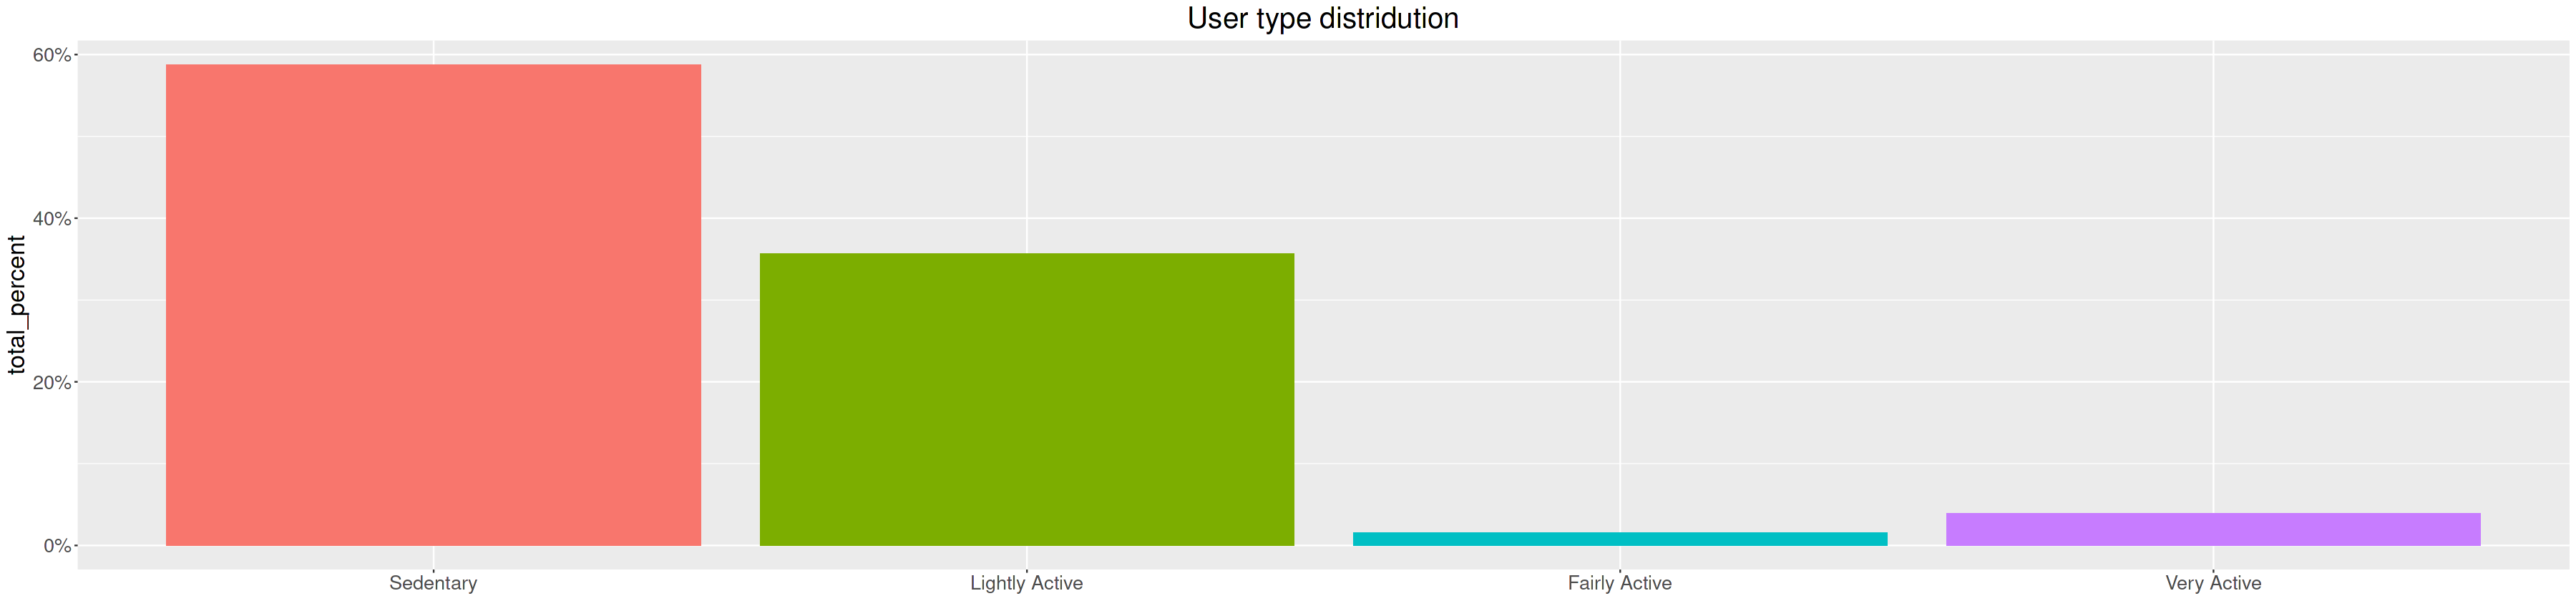

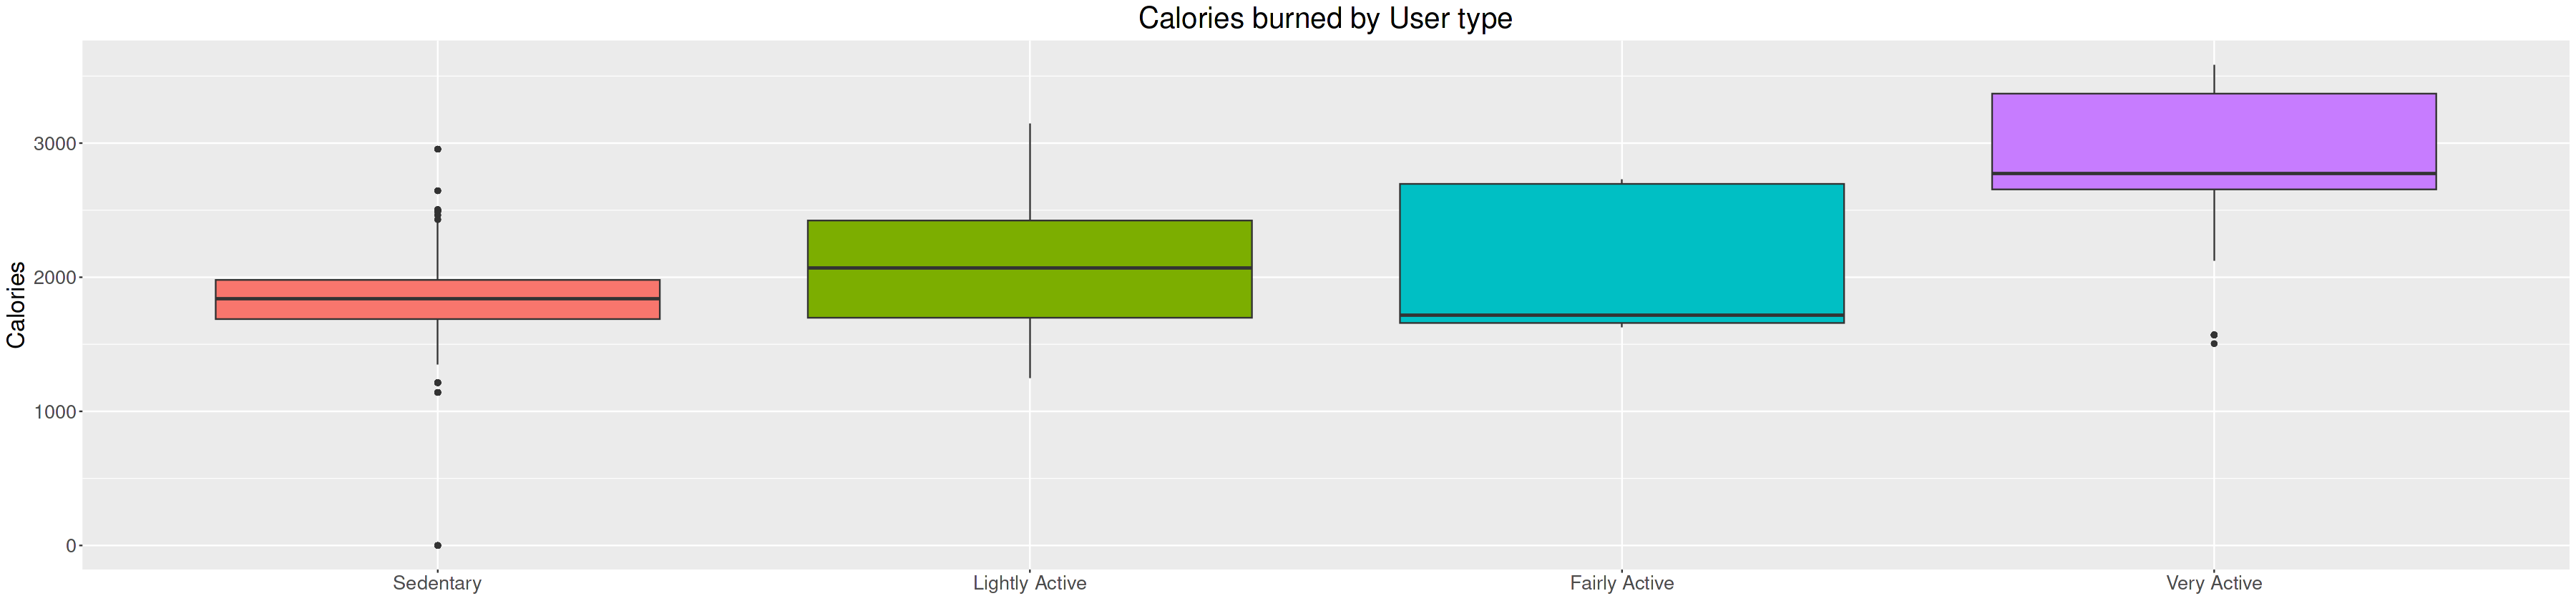

In [14]:
#With this new table I can now visualize both the user type distribution and the calories burned for every user type:
data_by_usertype %>%
group_by(user_type) %>%
summarise(total = n()) %>%
mutate(totals = sum(total)) %>%
group_by(user_type) %>%
summarise(total_percent = total / totals) %>%
ggplot(aes(user_type,y=total_percent, fill=user_type)) +
    geom_col()+
    scale_y_continuous(labels = scales::percent) +
    theme(legend.position="none") +
    labs(title="User type distridution", x=NULL) +
    theme(legend.position="none", text = element_text(size = 20),plot.title = element_text(hjust = 0.5))

ggplot(data_by_usertype, aes(user_type, Calories, fill=user_type)) +
    geom_boxplot() +
    theme(legend.position="none") +
    labs(title="Calories burned by User type", x=NULL) +
    theme(legend.position="none", text = element_text(size = 20),plot.title = element_text(hjust = 0.5))

The data shows that the majority of users fall into the "Sedentary" or "Lightly active" categories, meaning they spend much of their time being relatively inactive. However, what's particularly interesting is that despite being the largest group, these users burn fewer calories compared to those in the "Fairly active" and "Very active" categories. The most active users, especially those in the "Very active" category, burn significantly more calories. This confirms the expectation that higher levels of physical activity lead to greater calorie expenditure, reinforcing the idea that activity level plays a crucial role in weight loss efforts.

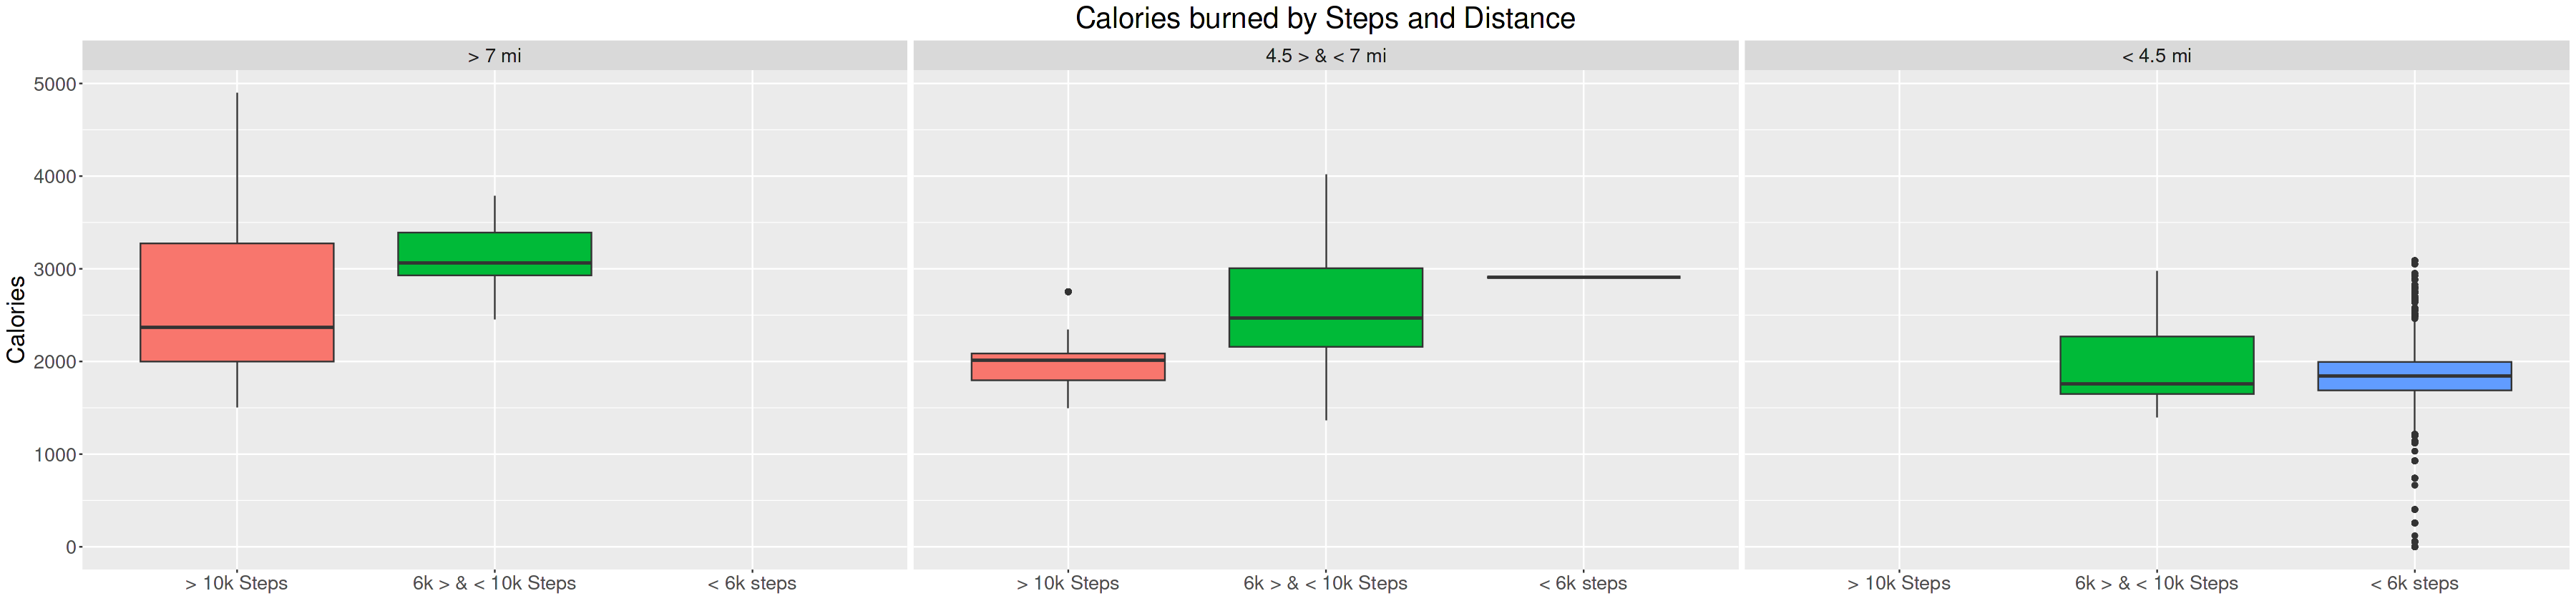

In [16]:
#I think it will also be interesting to check the relation between Distance/Steps and Calories burned so I plot them:
daily_data %>%
group_by(
distance = factor(case_when(
    TotalDistance < 4.5 ~ "< 4.5 mi",
    TotalDistance >= 4.5 & TotalDistance <= 7 ~ "4.5 > & < 7 mi",
    TotalDistance > 7 ~ "> 7 mi",
),levels = c("> 7 mi","4.5 > & < 7 mi","< 4.5 mi")),
steps = factor(case_when(
    TotalSteps < 6000 ~ "< 6k steps",
    TotalSteps >= 6000 & TotalSteps <= 10000 ~ "6k > & < 10k Steps",
    TotalSteps > 10000 ~ "> 10k Steps",
),levels = c("> 10k Steps","6k > & < 10k Steps","< 6k steps")),
Calories) %>%
ggplot(aes(steps,Calories,fill=steps)) +
    geom_boxplot() +
    facet_wrap(~distance)+
    labs(title="Calories burned by Steps and Distance",x=NULL) +
    theme(legend.position="none", text = element_text(size = 20),plot.title = element_text(hjust = 0.5))

The boxplot analysis compares the calories burned across three categories of steps and distances traveled. By faceting the plot by distance, the aim was to determine whether steps or distance traveled had a greater influence on calories burned. Interestingly, the results show that the most calories were burned by users in the "6k > & < 10k Steps" category who also traveled more than 7 miles. This suggests that these users were likely engaging in activities like running, which allowed them to cover more distance with fewer steps.

Additionally, there's an intriguing parallel between users in the "> 10k Steps" category within the medium distance group and those in the "<6k Steps" group in the low distance category. This reinforces the idea that speed, rather than the number of steps or distance alone, plays a critical role in determining how many calories are burned. This highlights the importance of intensity in physical activity when considering calorie expenditure.








In [41]:
#Now let's focus on the sleep quality, for that I will now make categories for the sleeping time and I will make a new table with the sleeping categories percent for each individual user type:
sleepType_by_userType <- daily_data %>%
group_by(Id) %>%
group_by(
user_type = factor(case_when(
    SedentaryMinutes > mean(SedentaryMinutes) & LightlyActiveMinutes < mean(LightlyActiveMinutes) & FairlyActiveMinutes < mean(FairlyActiveMinutes) & VeryActiveMinutes < mean(VeryActiveMinutes) ~ "Sedentary",
    SedentaryMinutes < mean(SedentaryMinutes) & LightlyActiveMinutes > mean(LightlyActiveMinutes) & FairlyActiveMinutes < mean(FairlyActiveMinutes) & VeryActiveMinutes < mean(VeryActiveMinutes) ~ "Lightly Active",
    SedentaryMinutes < mean(SedentaryMinutes) & LightlyActiveMinutes < mean(LightlyActiveMinutes) & FairlyActiveMinutes > mean(FairlyActiveMinutes) & VeryActiveMinutes < mean(VeryActiveMinutes) ~ "Fairly Active",
    SedentaryMinutes < mean(SedentaryMinutes) & LightlyActiveMinutes < mean(LightlyActiveMinutes) & FairlyActiveMinutes < mean(FairlyActiveMinutes) & VeryActiveMinutes > mean(VeryActiveMinutes) ~ "Very Active",
),levels=c("Sedentary", "Lightly Active", "Fairly Active", "Very Active")),
sleep_type = factor(case_when(
    mean(TotalMinutesAsleep) < 360 ~ "Bad Sleep",
    mean(TotalMinutesAsleep) > 360 & mean(TotalMinutesAsleep) <= 480 ~ "Normal Sleep",
    mean(TotalMinutesAsleep) > 480 ~ "Over Sleep",
),levels=c("Bad Sleep", "Normal Sleep", "Over Sleep")), total_sleep = sum(TotalMinutesAsleep) ,.groups="drop"
) %>%
drop_na() %>%
group_by(user_type) %>%
summarise(bad_sleepers = sum(sleep_type == "Bad Sleep"), normal_sleepers = sum(sleep_type == "Normal Sleep"),over_sleepers = sum(sleep_type == "Over Sleep"),total=n(),.groups="drop") %>%
group_by(user_type) %>%
group_by(
    bad_sleepers = bad_sleepers / total, 
    normal_sleepers = normal_sleepers / total, 
    over_sleepers = over_sleepers / total,
    .groups="drop"
)

Using user_type, .groups as id variables



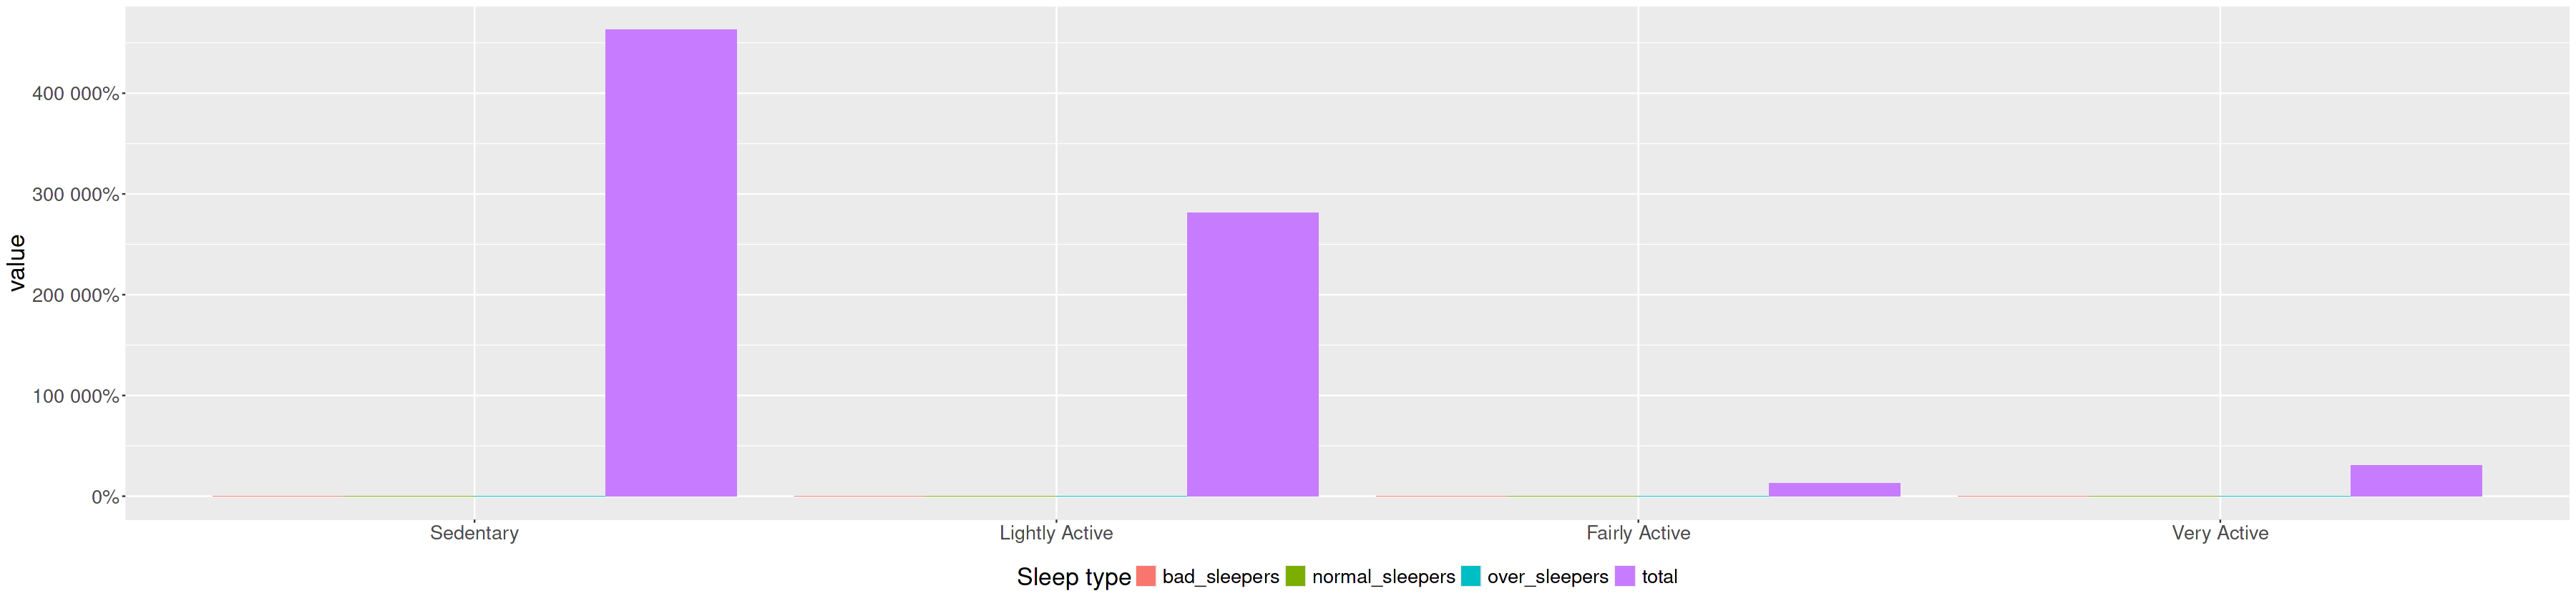

In [42]:
#Now we can plot the data for each user type:
sleepType_by_userType_melted<- reshape2::melt(sleepType_by_userType)

ggplot(sleepType_by_userType_melted, aes(user_type, value, fill = variable)) +
geom_bar(position = "dodge", stat = "identity") +
scale_y_continuous(labels = scales::percent) +
labs(x=NULL, fill="Sleep type") + 
theme(legend.position="bottom",text = element_text(size = 20),plot.title = element_text(hjust = 0.5))

# PHASE 5 : Share
Key objectives:

**1.Share my conclusions.:**

There are some interesting insights I found in this data that I think would be interesting when better targeting the marketing messages to new customers:

1) There is a clear relation between higher intensity activity and calories burned so logging the activity with the device could be a good motivator to increase your activity if you have some kind of plan to lose weight.

2) The data also shows a clear trend of better quality sleep linked to the activity level that would be interesting to improve your sleep and in general to low stress and improving your quality of life.

With all this in mind I would suggest focusing the marketing messages on the improving sleep and lowering stress and on the fitness/losing weight aspects of the devices as using this device to track your sleep and activity will encourage the user to increase their activities seeing the improvement in their metrics.